In [1]:
#https://github.com/apachecn/kaggle/tree/master/competitions/getting-started/titanic

# 导入相关数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
#让图片嵌在网页中

In [2]:
#dev1
root_path = '../data/titanic/input'

data_train = pd.read_csv('%s/%s' % (root_path, 'train.csv'))
data_test = pd.read_csv('%s/%s' % (root_path, 'test.csv'))

In [3]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 返回每列列名,该列非nan值个数,以及该列类型
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# 返回数值型变量的统计量
# train.describe(percentiles=[0.00, 0.25, 0.5, 0.75, 1.00])
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


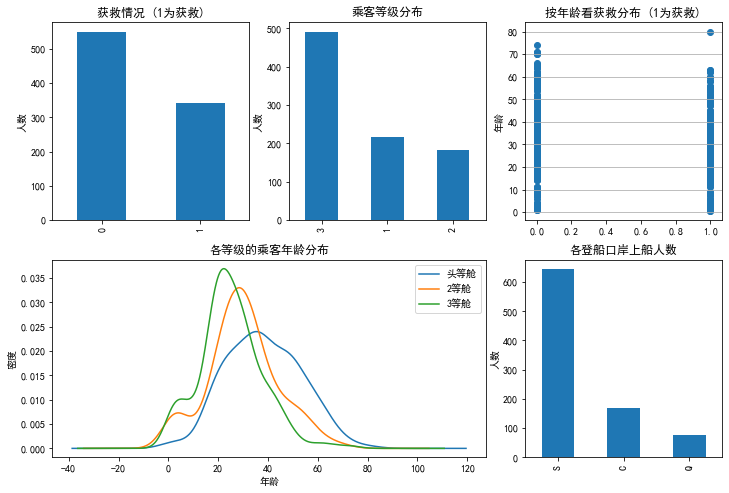

In [7]:
#import matplotlib.pyplot as plt
# 解决中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure()
fig.set_size_inches(12, 8)
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

In [8]:
# 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
data_train_corr = data_train.drop('PassengerId',axis=1).corr()
data_train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


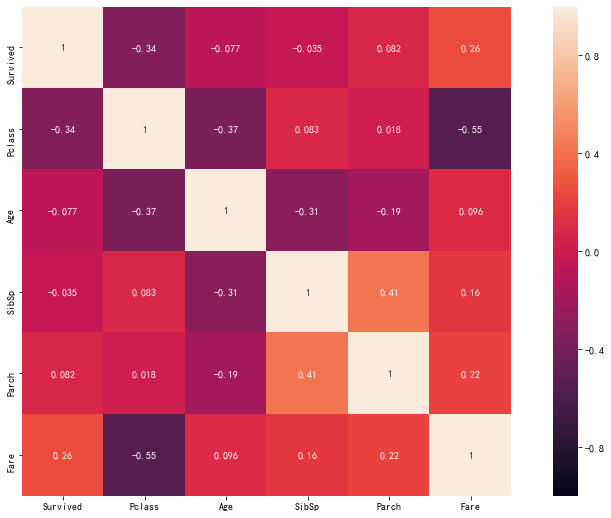

In [9]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(data_train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

<Figure size 432x288 with 0 Axes>

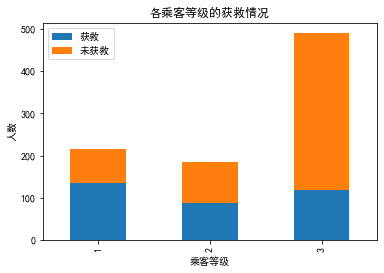

In [10]:
#
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

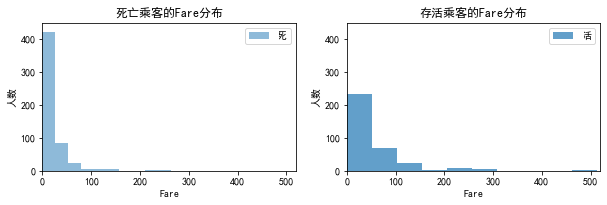

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
fig.set_size_inches(10, 6)

plt.subplot2grid((2,2),(0,0)) 
data_train.Fare[data_train.Survived == 0].plot(kind='hist', bins=10, alpha=0.5)   
plt.ylim(0,450)
plt.xlim(0,520)
plt.xlabel(u"Fare")# plots an axis lable
plt.ylabel(u"人数") 
plt.title(u"死亡乘客的Fare分布")
plt.legend((u'死'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,2),(0,1))
data_train.Fare[data_train.Survived == 1].plot(kind='hist', bins=10, alpha=0.7)
plt.ylim(0,450)
plt.xlim(0,520)
plt.xlabel(u"Fare")# plots an axis lable
plt.ylabel(u"人数") 
plt.title(u"存活乘客的Fare分布")
plt.legend(( u'活'),loc='best') # sets our legend for our graph.


<Figure size 432x288 with 0 Axes>

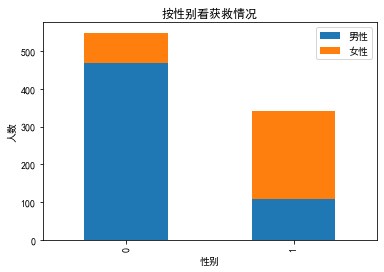

In [12]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

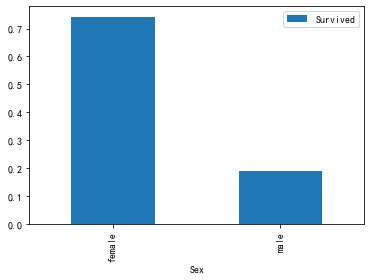

In [13]:
data_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

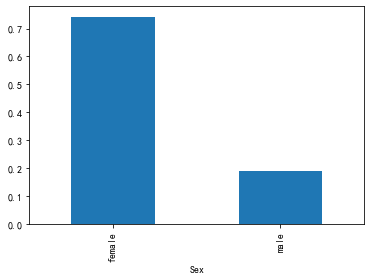

In [14]:
data_train.groupby(['Sex'])['Survived'].mean().plot.bar()

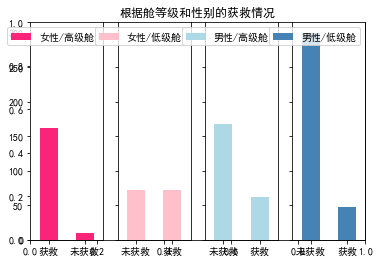

In [15]:
 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

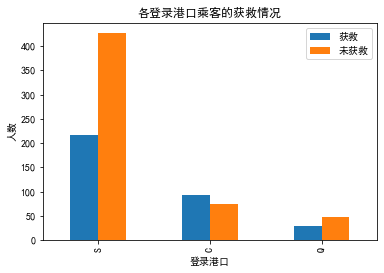

In [16]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
#df.plot(kind='bar', stacked=True)
df.plot(kind='bar', stacked=False)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

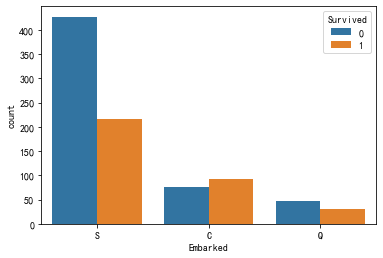

In [17]:
sns.countplot('Embarked',hue='Survived',data=data_train)

In [18]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)


                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


In [19]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴把
#cabin只有204个乘客有值，我们先看看它的一个分布
data_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
E101           3
F33            3
F2             3
C52            2
C123           2
D35            2
E67            2
E24            2
E33            2
B5             2
F4             2
C2             2
B51 B53 B55    2
C78            2
C124           2
B58 B60        2
D26            2
D36            2
E44            2
B18            2
E121           2
B35            2
D17            2
C83            2
B49            2
              ..
A24            1
E34            1
D28            1
F G63          1
C32            1
B37            1
D49            1
B102           1
C99            1
D6             1
C62 C64        1
B3             1
C118           1
E31            1
B19            1
B38            1
C46            1
C30            1
F E69          1
C95            1
C54            1
T              1
D45            1
A34            1
D11            1
A10            1
E77            1
E50           

<Figure size 432x288 with 0 Axes>

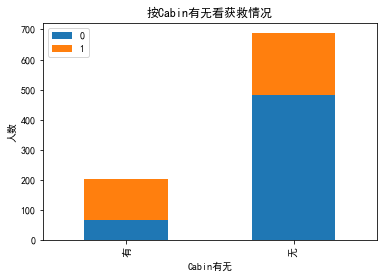

In [20]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [21]:
#先将数据集合并,一起做特征工程(注意,标准化的时候需要分开处理)
#先将test补齐,然后通过pd.apped()合并
data_train = pd.read_csv('%s/%s' % (root_path, 'train.csv'))
data_test = pd.read_csv('%s/%s' % (root_path, 'test.csv'))
data_test['Survived']=0
data_all=data_train.append(data_test,sort=True)
data_all.info()
data_all[pd.isnull(data_all.Fare)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,0,3701


In [22]:
data_all.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [23]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

#用pclass=3和Embarked=S的平均数14.644083来填充
data_all["Fare"].fillna(14.435422,inplace=True)

data_all, rfr = set_missing_ages(data_all)
data_all = set_Cabin_type(data_all)
data_all.head(5)




,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,No,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,Yes,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,No,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,Yes,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,No,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [24]:
#兄妹配偶数和父母子女数都是认识人的数量,所以总数可能也会更好
data_all['SibSp_Parch'] = data_all['SibSp'] + data_all['Parch']
data_all = pd.get_dummies(data_all,columns = ['SibSp_Parch']) 
data_all.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
0,22.0,No,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,A/5 21171,0,1,0,0,0,0,0,0,0
1,38.0,Yes,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,PC 17599,0,1,0,0,0,0,0,0,0
2,26.0,No,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,STON/O2. 3101282,1,0,0,0,0,0,0,0,0
3,35.0,Yes,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,113803,0,1,0,0,0,0,0,0,0
4,35.0,No,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,373450,1,0,0,0,0,0,0,0,0


In [25]:
#从名字中提取出称呼： df['Name].str.extract()是提取函数,配合正则一起使用
data_all['Name1'] = data_all['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

#将姓名分类处理()
data_all['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
data_all['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
data_all['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
data_all['Name1'].replace(['Mlle', 'Miss'], 'Miss')
data_all['Name1'].replace(['Mr'], 'Mr' , inplace = True)
data_all['Name1'].replace(['Master'], 'Master' , inplace = True)

#分列处理
data_all = pd.get_dummies(data_all,columns=['Name1'])

In [26]:
#从姓名中提取出姓
data_all['Name2'] = data_all['Name'].apply(lambda x: x.split('.')[1])

#计算数量,然后合并数据集
Name2_sum = data_all['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
data_all = pd.merge(data_all,Name2_sum,how='left',on='Name2')

#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
data_all.loc[data_all['Name2_sum'] == 1 , 'Name2_new'] = 'one'
data_all.loc[data_all['Name2_sum'] > 1 , 'Name2_new'] = data_all['Name2']
del data_all['Name2']

#分列处理
data_all = pd.get_dummies(data_all,columns=['Name2_new'])

#删掉姓名这个特征
#del train_test['Name']

In [27]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
data_all['Ticket_Letter'] = data_all['Ticket'].str.split().str[0]
data_all['Ticket_Letter'] = data_all['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
data_all.drop('Ticket',inplace=True,axis=1)
#分列,此时nan值可以不做处理
data_all = pd.get_dummies(data_all,columns=['Ticket_Letter'],drop_first=True)

In [28]:
#将年龄划分是个阶段10以下,10-18,18-30,30-50,50以上
data_all['Age'] = pd.cut(data_all['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

data_all = pd.get_dummies(data_all,columns=['Age'])

In [29]:
dummies_Cabin = pd.get_dummies(data_all['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_all['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_all['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_all['Pclass'], prefix= 'Pclass')

df = pd.concat([data_all, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex',  'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(5)

,Fare,Parch,PassengerId,SibSp,Survived,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,7.2500,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
1,71.2833,0,2,1,1,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
2,7.9250,0,3,0,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,53.1000,0,4,1,1,0,1,0,0,0,...,0,1,0,0,1,1,0,1,0,0
4,8.0500,0,5,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


In [30]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
#age_scale_param = scaler.fit(df['Age'].values.reshape(-1, 1))
#df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1), fare_scale_param)
df.drop([ 'Fare'], axis=1, inplace=True)
df.head(5)

,Parch,PassengerId,SibSp,Survived,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,...,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled
0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,-0.503291
1,0,2,1,1,0,1,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0.734744
2,0,3,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,-0.490240
3,0,4,1,1,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0.383184
4,0,5,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,-0.487823


In [31]:
#划分数据集
from sklearn.model_selection import cross_val_score, train_test_split
df_train = df[:891]
df_test = df[891:]
#df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
train_data_X = df_train.drop(['PassengerId','Survived'],axis=1)
train_data_Y = df_train['Survived']
test_data_X = df_test.drop(['PassengerId','Survived'],axis=1)
test_data_Y = df_test['Survived']

In [32]:
#learning curve
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve
#from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff


In [33]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

E:\CAE\program\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


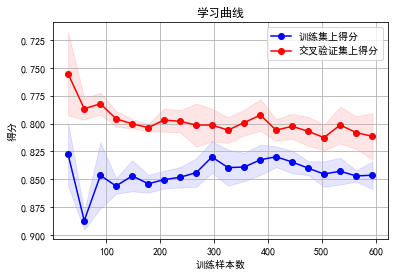

(0.8246262666616966, 0.06786811583496866)

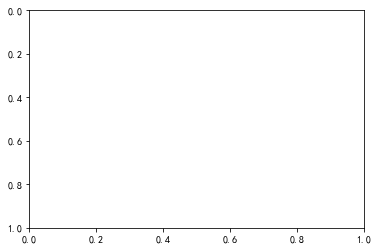

In [34]:
#随机森林
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_split=4,min_samples_leaf=4,max_depth=10,oob_score=True)
rf.fit(train_data_X,train_data_Y)


data_test["Survived"] = rf.predict(test_data_X)
RF = data_test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')
"""
predictions = rf.predict(test_data_X)
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("RF.csv", index=False)

"""

plot_learning_curve(rf, u"学习曲线", train_data_X, train_data_Y)

In [35]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
#param = {'penalty': ['l1'], 'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc", return_train_score=True)
clf.fit(train_data_X_sd, train_data_Y)

# 打印参数的得分情况
#clf.grid_scores_
clf.cv_results_
print(clf.best_score_)
# 打印最佳参数
print(clf.best_params_)
clf.refit

# 将最佳参数传入训练模型
#lr = LogisticRegression(**clf.best_params_)
#lr.fit(train_data_X_sd, train_data_Y)

# 输出结果
data_test["Survived"] = clf.predict(test_data_X_sd)
data_test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('LS5.csv')
np.mean(clf.predict(test_data_X_sd)==test_data_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.8716576970930556
{'C': 0.01, 'max_iter': 100}


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.3s finished
E:\CAE\program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5741626794258373

In [36]:
# SVM
from sklearn import svm
svc = svm.SVC()

clf = GridSearchCV(svc,param,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
clf.fit(train_data_X_sd,train_data_Y)

clf.best_params_

svc = svm.SVC(C=1,max_iter=250)

# 训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
svc.predict(test_data_X_sd)

# 打印结果
data_test["Survived"] = svc.predict(test_data_X_sd)
SVM = data_test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1.csv')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
E:\CAE\program\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\CAE\program\Anaconda\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
E:\CAE\program\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:

In [37]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(learning_rate=0.7,max_depth=6,n_estimators=100,min_samples_leaf=2)

gbdt.fit(train_data_X,train_data_Y)

data_test["Survived"] = gbdt.predict(test_data_X)
data_test[['PassengerId','Survived']].set_index('PassengerId').to_csv('gbdt3.csv')

In [38]:
#xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6)
xgb_model.fit(train_data_X,train_data_Y)

data_test["Survived"] = xgb_model.predict(test_data_X)
XGB = data_test[['PassengerId','Survived']].set_index('PassengerId')
XGB.to_csv('XGB5.csv')

In [39]:
#模型融合 voting
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,max_iter=100)

import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round = 5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb_model)], voting='hard')
vot.fit(train_data_X_sd,train_data_Y)

data_test["Survived"] = vot.predict(test_data_X_sd)
data_test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot5.csv')

E:\CAE\program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
#模型融合 stacking
# 划分train数据集,调用代码,把数据集名字转成和代码一样
X = train_data_X_sd
X_predict = test_data_X_sd
y = train_data_Y

'''模型融合中使用到的各个单模型'''
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [LogisticRegression(C=0.1,max_iter=100),
        xgb.XGBClassifier(max_depth=6,n_estimators=100,num_round = 5),
        RandomForestClassifier(n_estimators=100,max_depth=6,oob_score=True),
        GradientBoostingClassifier(learning_rate=0.3,max_depth=6,n_estimators=100)]

# 创建n_folds
#from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
#n_folds = 5
#skf = list(StratifiedKFold(y, n_folds))
skf=StratifiedKFold(n_splits=5,random_state=0, shuffle=False)


# 创建零矩阵
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 建立模型
for j, clf in enumerate(clfs):
    '''依次训练各个单模型'''
    # print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], len(skf)))
    for i, (train, test) in enumerate(skf):
        '''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        # print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
    '''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

# 用建立第二层模型
clf2 = LogisticRegression(C=0.1,max_iter=100)
clf2.fit(dataset_blend_train, y)
y_submission = clf2.predict_proba(dataset_blend_test)[:, 1]

data_test = pd.read_csv('%s/%s' % (root_path, 'test.csv'))
data_test["Survived"] = clf2.predict(dataset_blend_test)
data_test[['PassengerId','Survived']].set_index('PassengerId').to_csv('stack3.csv')

TypeError: object of type 'StratifiedKFold' has no len()